In [1]:
import seaborn as sns
import pandas as pd

In [2]:
tmdb = pd.read_csv("../Data/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

# Categorical => Non numerical ordering that does not have an explicit higher or lower value (Ex.: Names, Languages)
# Ordinal => Non numerical ordering that have an explicit higher or lower value (Ex.: Scholarship degree, Economic Class)
# Numerical Discrete => Numerical ordering that have a explicit set of values (Ex.: Integers, Indexes)
# Numerical Continuous => Numerical ordering that does not have a explicit set of values (Ex.: Float, +-Inf)

<AxesSubplot:xlabel='index', ylabel='original_language'>

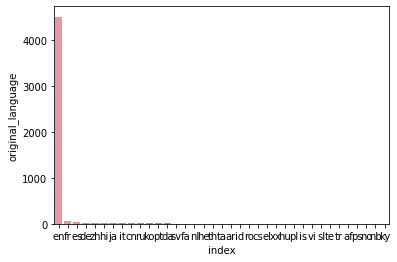

In [4]:
#Accessing a categorical dataset, geting its values, adding do a dataframe
language_counter = tmdb['original_language'].value_counts().to_frame().reset_index()
#Ploting this new dataframe into a barplot
sns.barplot(x = "index", y = 'original_language', data = language_counter)

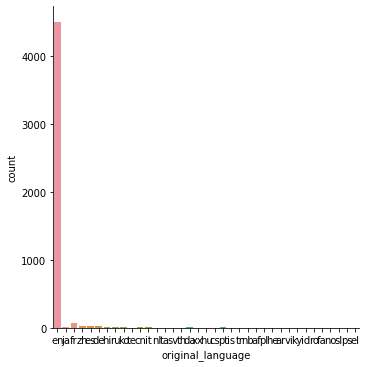

In [5]:
#Easier way to do the cell above
sns.catplot(x = 'original_language', kind='count', data=tmdb)

In [6]:
#The issue lies on that english movies are way more frequent than other languages, so we sitf the wheat from the chaff
all_languages = tmdb["original_language"].value_counts()
total = all_languages.sum()
english = all_languages.loc['en']
others = total - english


<AxesSubplot:xlabel='Language', ylabel='Total'>

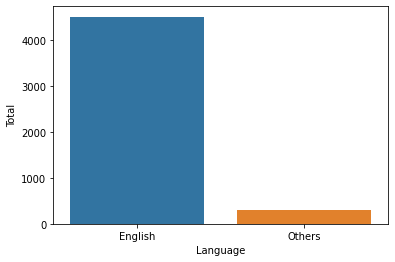

In [7]:
# Ploting a new graph with cleaner values
data = {'Language': ['English', 'Others'], 'Total': [english, others]}
data = pd.DataFrame(data)
sns.barplot(x="Language", y="Total", data=data)

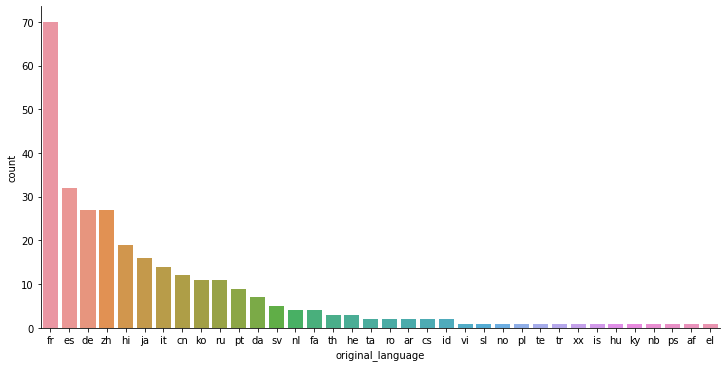

In [9]:
# Getting specific data from Others
Other_languages_mv = tmdb.query('original_language != "en"')
order = Other_languages_mv.original_language.value_counts()
sns.catplot(x='original_language', kind='count', data= Other_languages_mv, aspect=2, order=order.index, palette="rocket")